In [1]:
import os

import matplotlib.pyplot as plt
# import nltk
import pandas as pd
import seaborn as sns

In [2]:
# nltk.download('stopwords', download_dir='../../Resources/')
# nltk.download('punkt', download_dir='../../Resources/')
# nltk.download('wordnet', download_dir='../../Resources/')
# nltk.download('omw-1.4', download_dir='../../Resources/')
# nltk.download('words', download_dir='../../Resources/')

[nltk_data] Downloading package stopwords to ../../Resources/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ../../Resources/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ../../Resources/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ../../Resources/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to ../../Resources/...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
# nltk.data.path.append('../../Resources/')

In [4]:
! ls ../../Data/boost_labelled

news1.csv news3.csv news5.csv news7.csv news9.csv
news2.csv news4.csv news6.csv news8.csv


In [17]:
BASIC_PATH = './data/boost_labelled'

In [18]:
filenames = []

In [19]:
for filename in os.listdir(BASIC_PATH):
    if not filename.startswith('.'):
        filenames.append(f'{BASIC_PATH}/{filename}')
filenames

['./data/boost_labelled/news3.csv',
 './data/boost_labelled/news2.csv',
 './data/boost_labelled/news1.csv',
 './data/boost_labelled/news5.csv',
 './data/boost_labelled/news4.csv',
 './data/boost_labelled/news6.csv',
 './data/boost_labelled/news7.csv',
 './data/boost_labelled/news9.csv',
 './data/boost_labelled/news8.csv']

In [20]:
data = pd.DataFrame()
for filename in filenames:
    print('Reading', filename)
    df = pd.read_csv(filename, sep=';', header=0)
    data = pd.concat([data, df]).reset_index(drop=True)
data

Reading ./data/boost_labelled/news3.csv
Reading ./data/boost_labelled/news2.csv
Reading ./data/boost_labelled/news1.csv
Reading ./data/boost_labelled/news5.csv
Reading ./data/boost_labelled/news4.csv
Reading ./data/boost_labelled/news6.csv
Reading ./data/boost_labelled/news7.csv
Reading ./data/boost_labelled/news9.csv
Reading ./data/boost_labelled/news8.csv


,source,title,published_at,currencies,News value,full_news_url,description
0,Executive Chairman,RT @justmoon: This is a post I've been wanting...,2022-12-07T19:13:11Z,XRP,0.0,https://cryptopanic.com/news/17094657/RT-justm...,NaN
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre..."
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...
...,...,...,...,...,...,...,...
1673,Feed - Cryptopotato.Com,"OKX Proof-of-Reserves Report: Bitcoin, Ether, ...",2022-12-23T18:10:53Z,USDT,1.0,https://cryptopanic.com/news/17225884/OKX-Proo...,<p>The recently published Merkle tree PoR prog...
1674,CryptoSlate,Bitcoin miners increased hash rate and product...,2022-12-23T18:00:30Z,BTC,0.0,https://cryptopanic.com/news/17225863/Bitcoin-...,<p>The price of Bitcoin (BTC) fell by 64.68% t...
1675,Co-founder of Ethereum,Looking forward to seeing who the next CEO is ...,2022-12-23T17:57:19Z,ETH,0.0,https://cryptopanic.com/news/17225833/Looking-...,NaN
1676,The Daily Hodl,Twitter Adds Bitcoin (BTC) and Ethereum (ETH) ...,2022-12-23T17:55:29Z,"BTC,ETH",1.0,https://cryptopanic.com/news/17225843/Twitter-...,<p>Social media giant Twitter is adding Bitcoi...


<Axes: xlabel='News value', ylabel='count'>

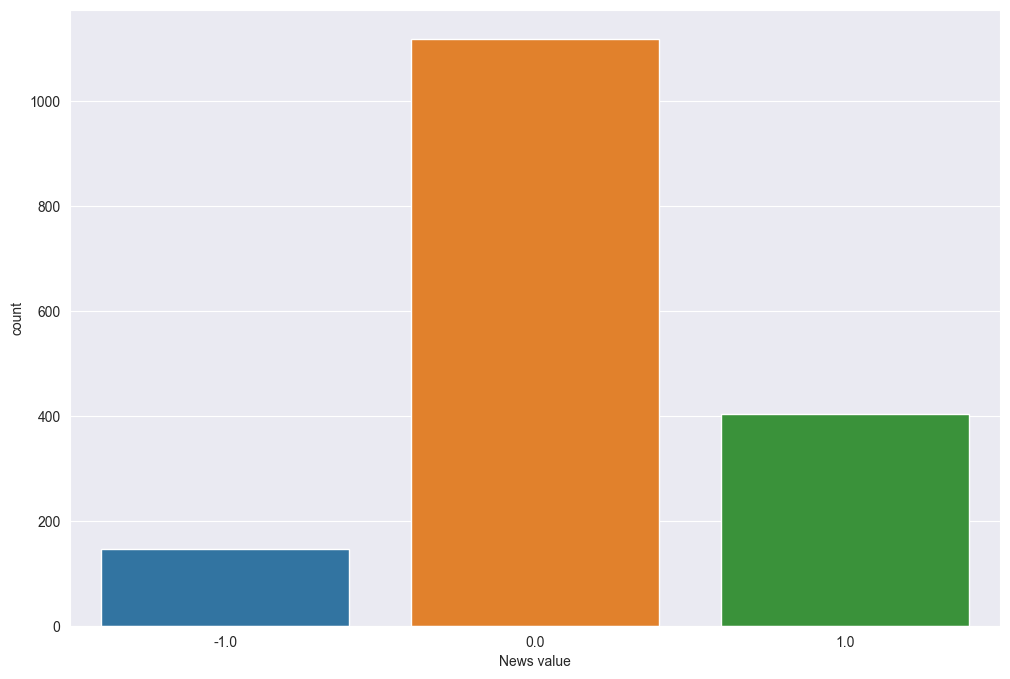

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data['News value'])

In [23]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   source         1657 non-null   object 
 1   title          1668 non-null   object 
 2   published_at   1657 non-null   object 
 3   currencies     1626 non-null   object 
 4   News value     1669 non-null   float64
 5   full_news_url  1677 non-null   object 
 6   description    1357 non-null   object 
dtypes: float64(1), object(6)
memory usage: 91.9+ KB


In [25]:
data = data[~data['description'].isna()]
data

,source,title,published_at,currencies,News value,full_news_url,description
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre..."
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...
5,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,<p>Blockchain trilemma is arguably the hardest...
...,...,...,...,...,...,...,...
1668,AMBCrypto,Binance takes measures to end attacks; BNB’s o...,2022-12-23T18:30:25Z,BNB,0.0,https://cryptopanic.com/news/17225912/Binance-...,Binance clears the air of doubts about its com...
1670,Blockworks,"Crypto ETFs Sank in 2022, but These 3 ‘Blockch...",2022-12-23T18:16:12Z,BTC,0.0,https://cryptopanic.com/news/17225879/Crypto-E...,<p>Amplify’s actively managed BLOK fund is dow...
1673,Feed - Cryptopotato.Com,"OKX Proof-of-Reserves Report: Bitcoin, Ether, ...",2022-12-23T18:10:53Z,USDT,1.0,https://cryptopanic.com/news/17225884/OKX-Proo...,<p>The recently published Merkle tree PoR prog...
1674,CryptoSlate,Bitcoin miners increased hash rate and product...,2022-12-23T18:00:30Z,BTC,0.0,https://cryptopanic.com/news/17225863/Bitcoin-...,<p>The price of Bitcoin (BTC) fell by 64.68% t...


In [26]:
data = data.drop_duplicates(['description'])
data

,source,title,published_at,currencies,News value,full_news_url,description
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre..."
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...
5,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,<p>Blockchain trilemma is arguably the hardest...
...,...,...,...,...,...,...,...
1654,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,<p>How great are chances for continued rise of...
1657,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...
1658,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,<p>A top executive of peer-to-peer crypto exch...
1660,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...


In [27]:
data['description'] = data['description'].apply(strip_tags)
data = data.reset_index(drop=True)
data

/var/folders/tn/_r_b9n8d0bg1fzccsh7yq_sc0000gn/T/ipykernel_22630/1640379453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description'] = data['description'].apply(strip_tags)


,source,title,published_at,currencies,News value,full_news_url,description
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse..."
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...
...,...,...,...,...,...,...,...
1331,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...
1332,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...
1333,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...
1334,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...


In [28]:
data['combined'] = 'Source: ' + data['source'] + ' Title: ' + data['title'] + ' Description: ' + data['description']
data['combined']

0       Source: CoinTelegraph Title: Bitcoin options d...
1       Source: The Daily Hodl Title: Crypto Exchange ...
2       Source: The Daily Hodl Title: BitKeep Wallet G...
3       Source: Bitcoin Magazine Title: Kazakhstan Pre...
4       Source: CoinTelegraph Title: The blockchain tr...
                              ...                        
1331    Source: U.Today Title: Ethereum (ETH) Price An...
1332    Source: ZyCrypto Title: Digital Assets Amongst...
1333    Source: The Daily Hodl Title: Cardano, Litecoi...
1334    Source: ZyCrypto Title: Binance plans to inves...
1335    Source: ZyCrypto Title: Regulation Alone Isn’t...
Name: combined, Length: 1336, dtype: object

In [29]:
data = data[~data['combined'].isna()]
data['combined']

0       Source: CoinTelegraph Title: Bitcoin options d...
1       Source: The Daily Hodl Title: Crypto Exchange ...
2       Source: The Daily Hodl Title: BitKeep Wallet G...
3       Source: Bitcoin Magazine Title: Kazakhstan Pre...
4       Source: CoinTelegraph Title: The blockchain tr...
                              ...                        
1331    Source: U.Today Title: Ethereum (ETH) Price An...
1332    Source: ZyCrypto Title: Digital Assets Amongst...
1333    Source: The Daily Hodl Title: Cardano, Litecoi...
1334    Source: ZyCrypto Title: Binance plans to inves...
1335    Source: ZyCrypto Title: Regulation Alone Isn’t...
Name: combined, Length: 1318, dtype: object

In [30]:
data = data.drop_duplicates(['combined']).reset_index(drop=True)
data

,source,title,published_at,currencies,News value,full_news_url,description,combined
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...
...,...,...,...,...,...,...,...,...
1313,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...,Source: U.Today Title: Ethereum (ETH) Price An...
1314,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...,Source: ZyCrypto Title: Digital Assets Amongst...
1315,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...,"Source: The Daily Hodl Title: Cardano, Litecoi..."
1316,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...,Source: ZyCrypto Title: Binance plans to inves...


In [31]:
data['label'] = data['News value'].apply(lambda x: 1 if x in [1, -1] else 0)

In [32]:
data[['source', 'title', 'description', 'combined', 'label']].rename({'combined': 'text'}, axis=1).to_csv('output/classification/FULL_source_title_description_bin_clf.csv', index=False)

In [18]:
sources = list(data['source'].unique())

In [19]:
data['source_one_hot'] = data['source'].apply(lambda x: sources.index(x))
data['source_one_hot']

0       0
1       1
2       1
3       2
4       0
       ..
1313    9
1314    5
1315    1
1316    5
1317    5
Name: source_one_hot, Length: 1318, dtype: int64

In [20]:
data[['source_one_hot', 'News value']].corr()

,source_one_hot,News value
source_one_hot,1.000000,-0.041552
News value,-0.041552,1.000000


In [21]:
# data['label'] = data['News value'].apply(lambda x: 'growth' if x == 1 else 'decay' if x == -1 else 'no effect')

In [26]:
data['label'] = data['News value'].apply(lambda x: 'change' if x in [-1, 1] else 'no effect')

In [27]:
data_input = data[['combined', 'label']].copy()
data_input.columns = ['prompt', 'completion']
data_input['prompt'] = data_input['prompt'] + '\n\n###\n\n'
data_input['completion'] = ' ' + data_input['completion'] + ' END'
data_input

,prompt,completion
0,Source: CoinTelegraph Title: Bitcoin options d...,change END
1,Source: The Daily Hodl Title: Crypto Exchange ...,no effect END
2,Source: The Daily Hodl Title: BitKeep Wallet G...,no effect END
3,Source: Bitcoin Magazine Title: Kazakhstan Pre...,no effect END
4,Source: CoinTelegraph Title: The blockchain tr...,no effect END
...,...,...
1313,Source: U.Today Title: Ethereum (ETH) Price An...,no effect END
1314,Source: ZyCrypto Title: Digital Assets Amongst...,no effect END
1315,"Source: The Daily Hodl Title: Cardano, Litecoi...",change END
1316,Source: ZyCrypto Title: Binance plans to inves...,change END


In [29]:
data_input.to_json('./output/classification/source_title_description.jsonl', orient='records', lines=True)
data_input.to_csv('./output/classification/source_title_description.csv', index=False)